<a href="https://colab.research.google.com/github/proffranciscofernando/introduction-to-deep-learning/blob/main/introduction-to-LLMs%20(Br-Pt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introdução

LLMs (Large Language Models) são modelos de inteligência artificial treinados em grandes volumes de texto para entender e gerar linguagem natural. Eles usam redes neurais profundas, especialmente transformadores, para tarefas como tradução, resumo, resposta a perguntas e geração de texto.

O primeiro LLM amplamente reconhecido é o BERT (Bidirectional Encoder Representations from Transformers), lançado pelo Google em 2018. Ele foi pioneiro ao usar o treinamento bidirecional em textos, revolucionando várias tarefas de processamento de linguagem natural.

**BERT** foi projetado principalmente para melhorar tarefas de NLP (Natural Language Processing) como análise de sentimentos, respostas a perguntas e reconhecimento de entidades, mas não para gerar texto livre como o GPT. Isso o tornou mais técnico e menos "interativo" para o público geral.

#2. Embeddings

Embeddings são representações vetoriais (pode ser entendido como uma codificação vetorial) usados para transformar palavras, frases ou documentos em vetores numéricos que capturam seus significados e relações semânticas. Eles mapeiam elementos semelhantes para pontos próximos no espaço vetorial.

## Exemplo 1 de embedding

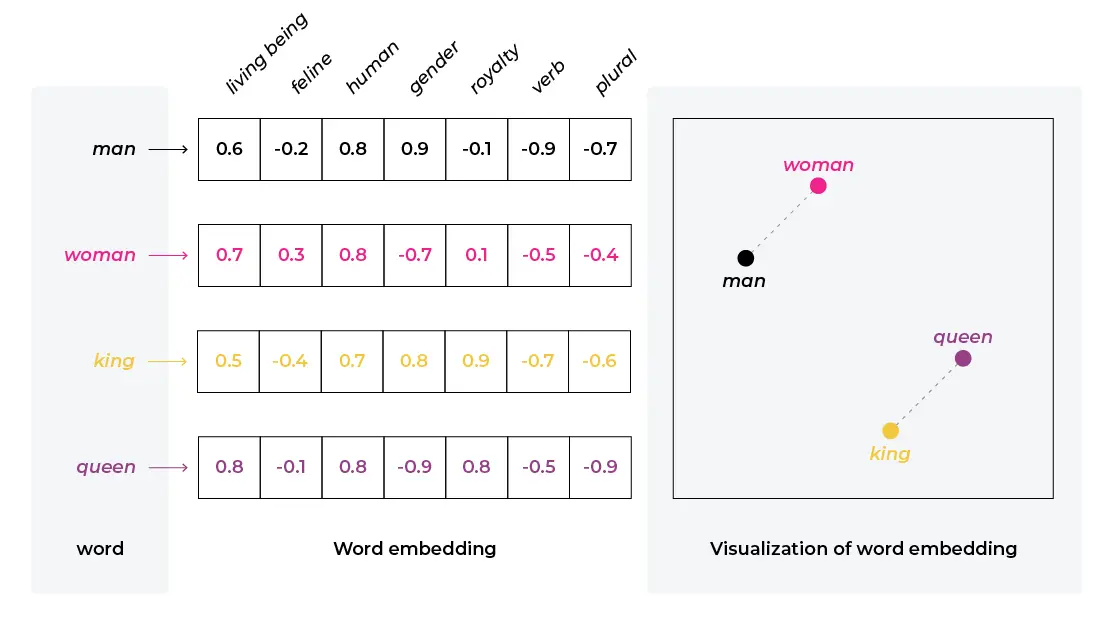

## Exemplo 2 de embedding

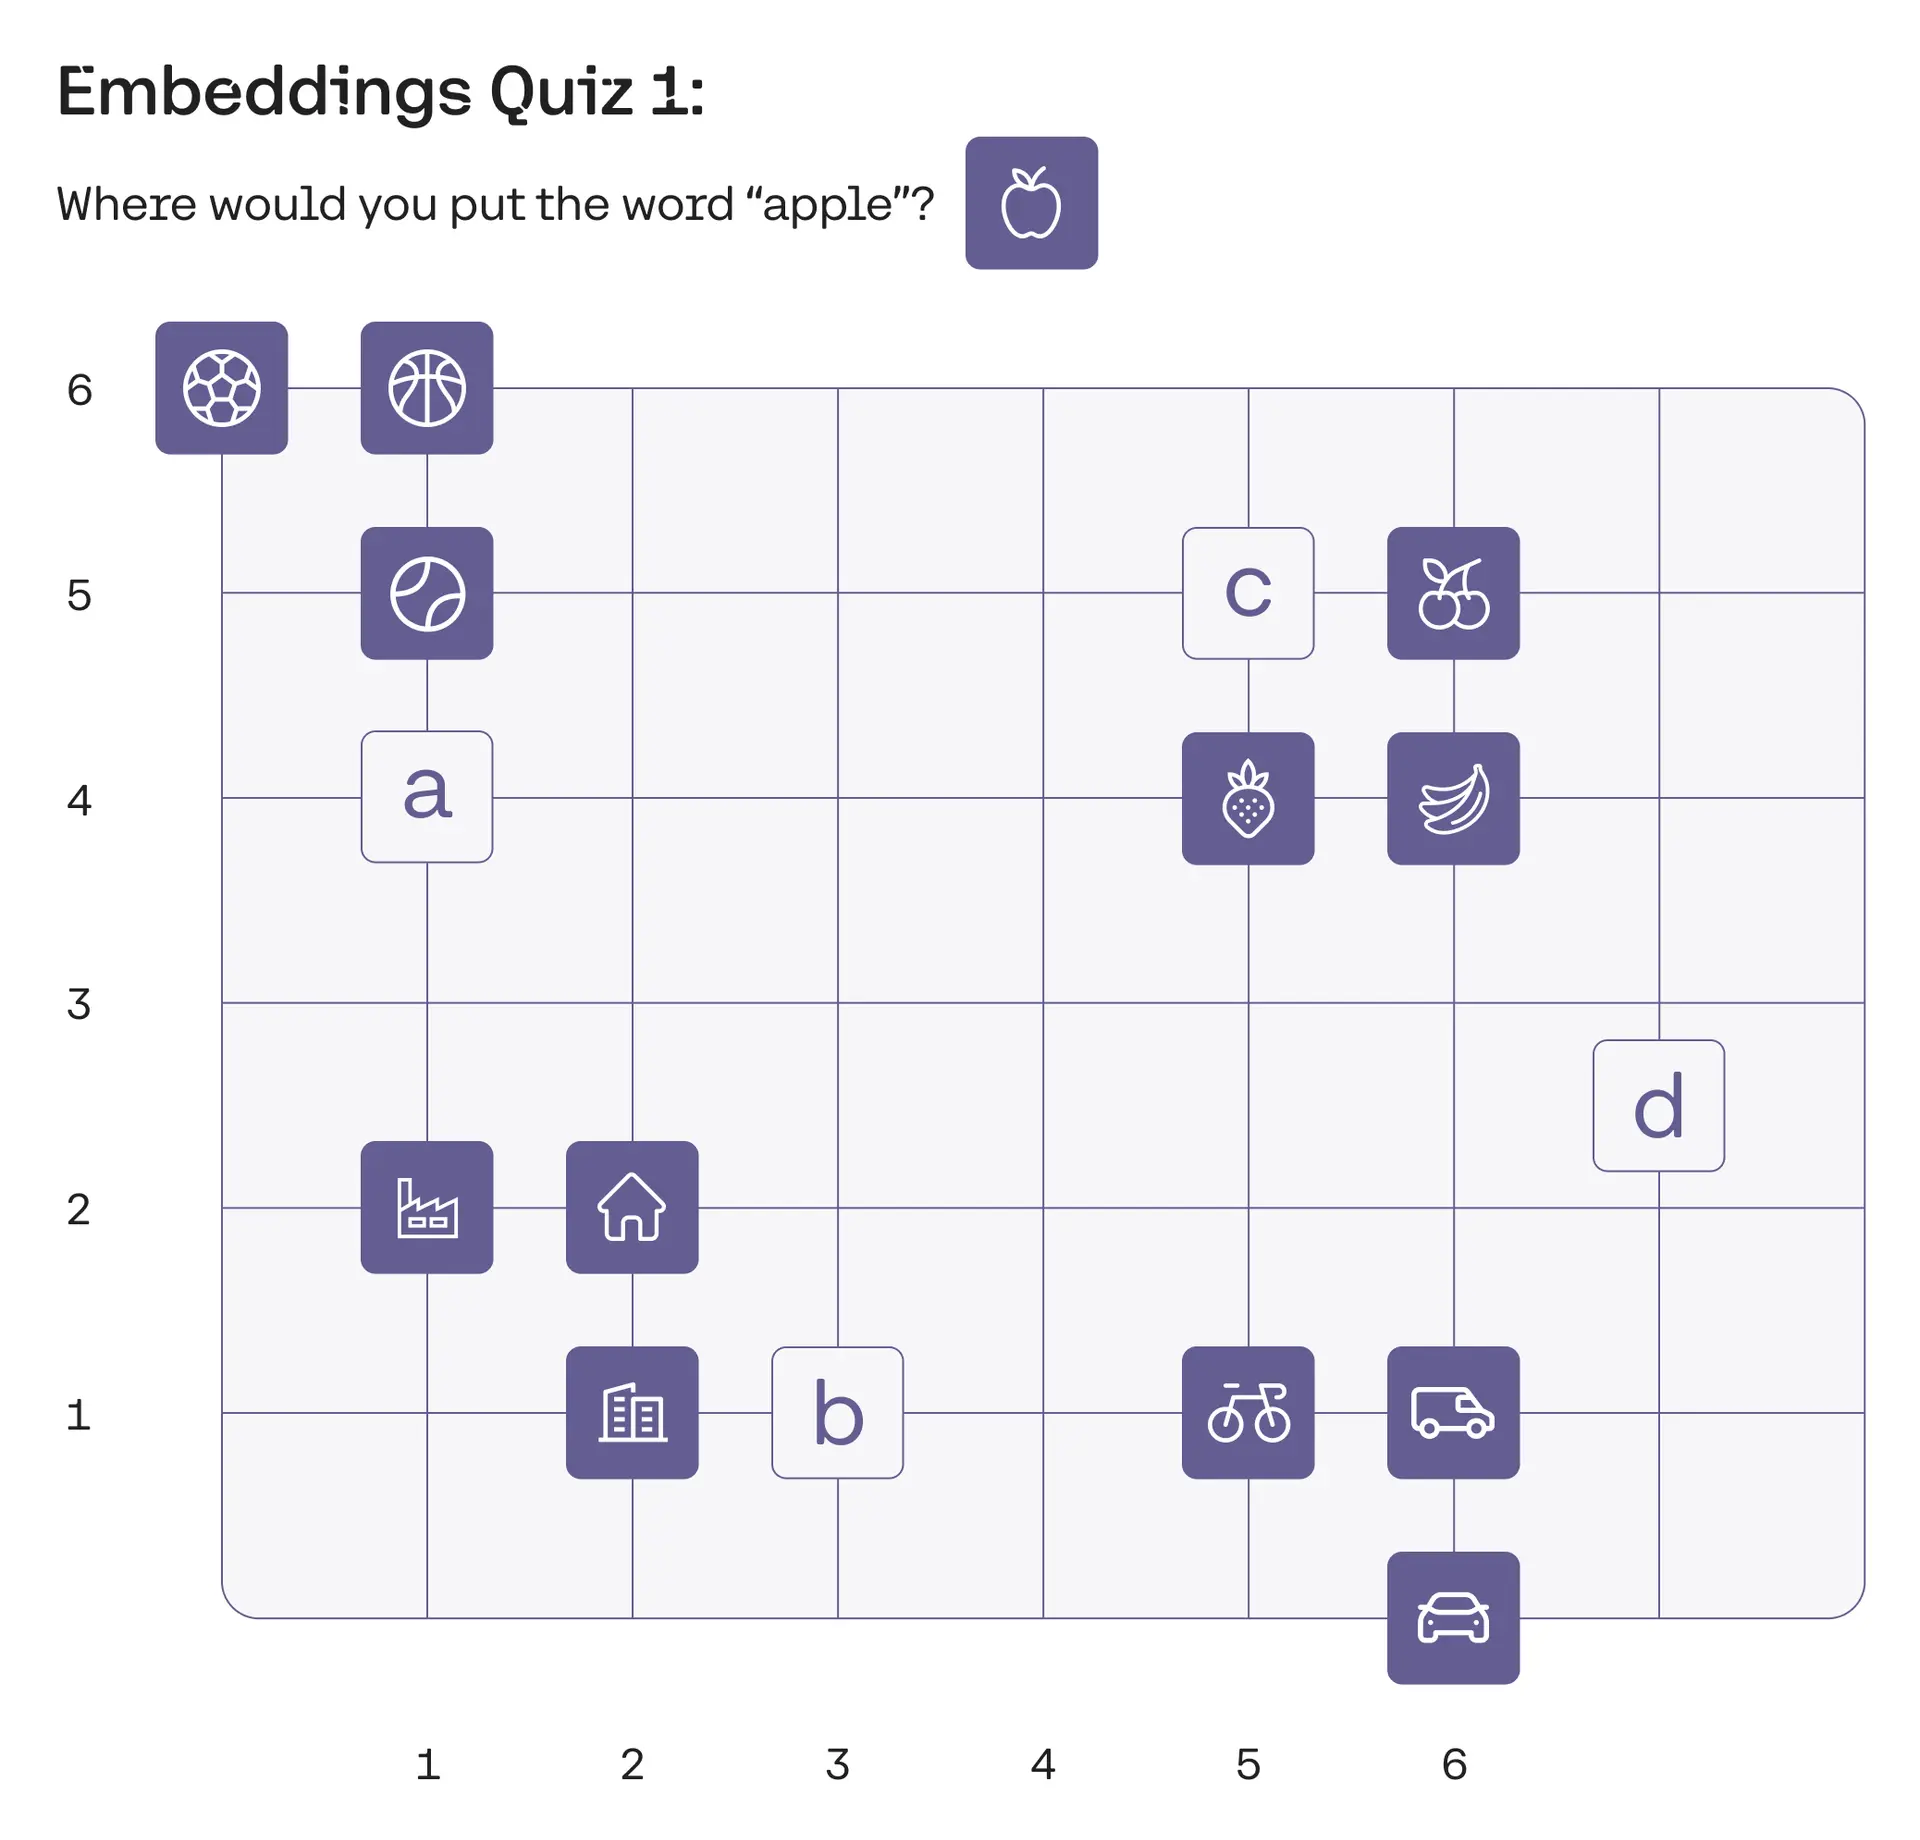

# 3. Similaridade

Para LLMs, é fundamental saber quando duas palavras ou duas frases são semelhantes ou diferentes. Dessa forma, os embeddings de palavras e frases são muito úteis para essa tarefa. Neste seção, abordamos algumas noções diferentes de similaridade.

## 3.1. Produto Escalar

O produto escalar (ou produto interno) entre dois vetores mede o grau de alinhamento entre eles. Em termos geométricos, ele quantifica o quanto um vetor "aponta" na direção do outro.

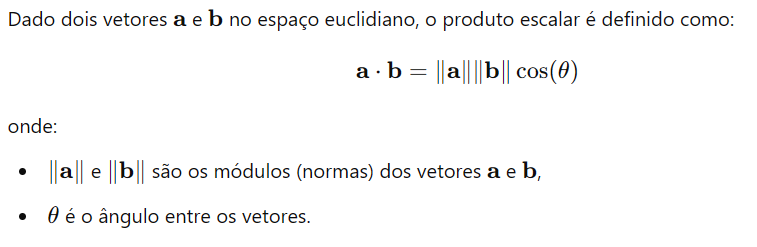

O produto escalar mede a **similaridade direcional entre dois vetores**, sendo máximo quando eles apontam na mesma direção, mínimo (negativo) quando apontam em direções opostas, e zero quando são ortogonais.

### Exemplo com filmes:

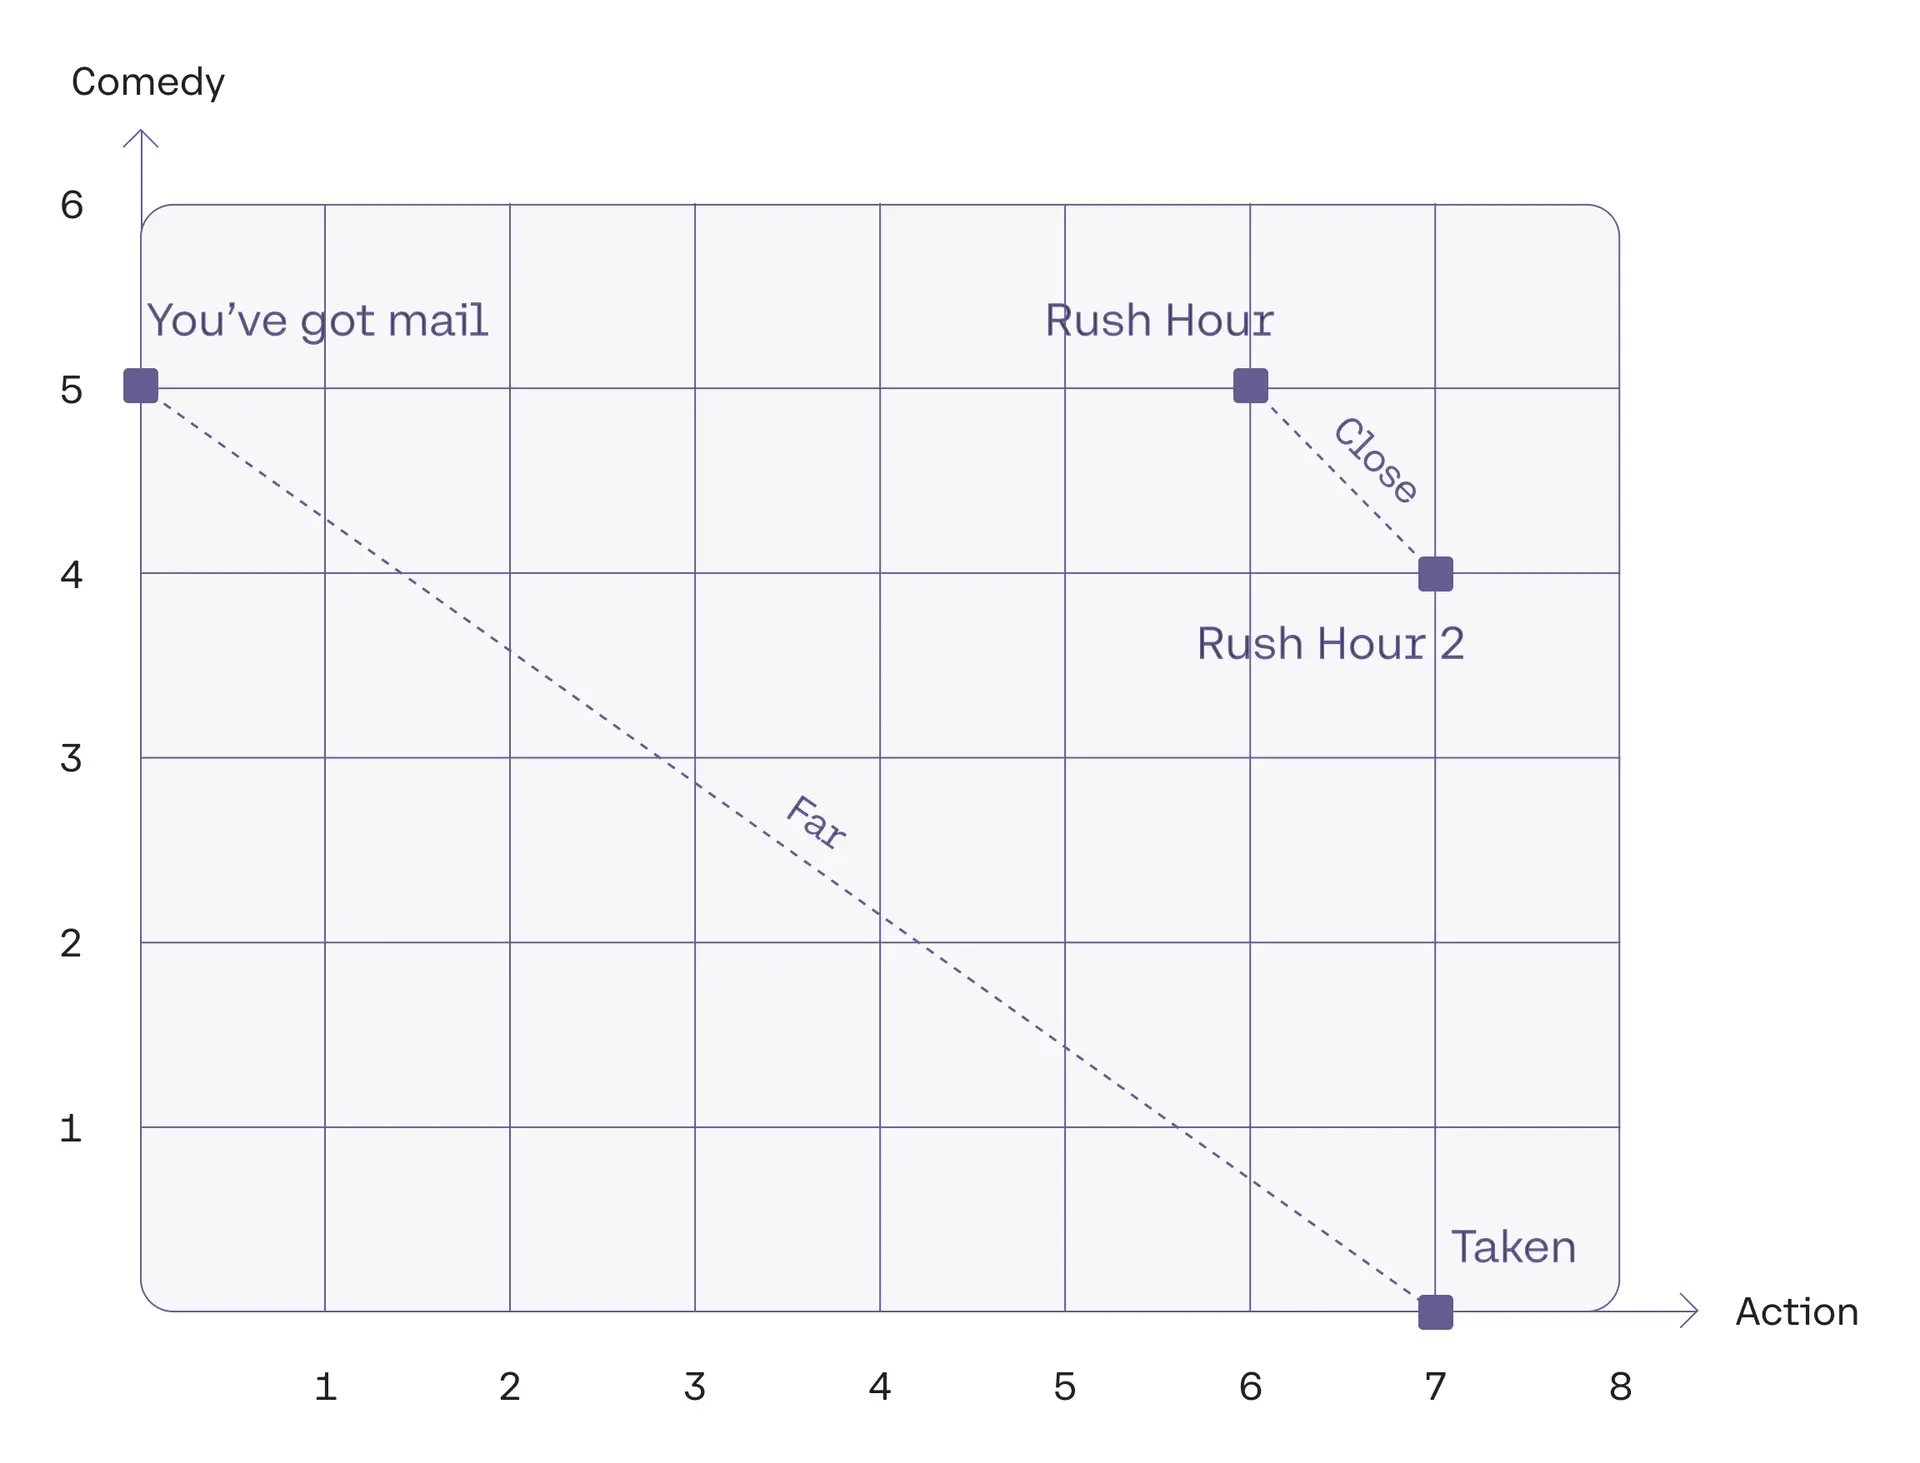

Vamos começar com um pequeno exemplo de embedding de sentenças. Para simplificar, vamos considerar um conjunto de dados com 4 frases, todas títulos de filmes, e um embedding de dimensão 2, o que significa que cada frase é representada por dois números. Suponhamos que o embedding seja o seguinte:

You’ve Got Mail: [0, 5]

Rush Hour: [6, 5]

Rush Hour 2: [7, 4]

Taken: [7, 0]

Organizando o embedding, temos:

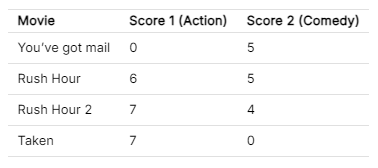

Cálculos dos produtos escalares:

* Produto escalar para o par [You’ve got mail, Taken] = 0x7 + 5x0 = 0

* Produto escalar para o par [Rush Hour, Rush Hour 2] = 6x7 + 5x4 = 62

Confirmada a intuição!

## 3.2. Cosseno

Outra medida de similaridade entre frases (e palavras) é observar o ângulo entre elas. Por exemplo, vamos olhar novamente o exemplo anterior:


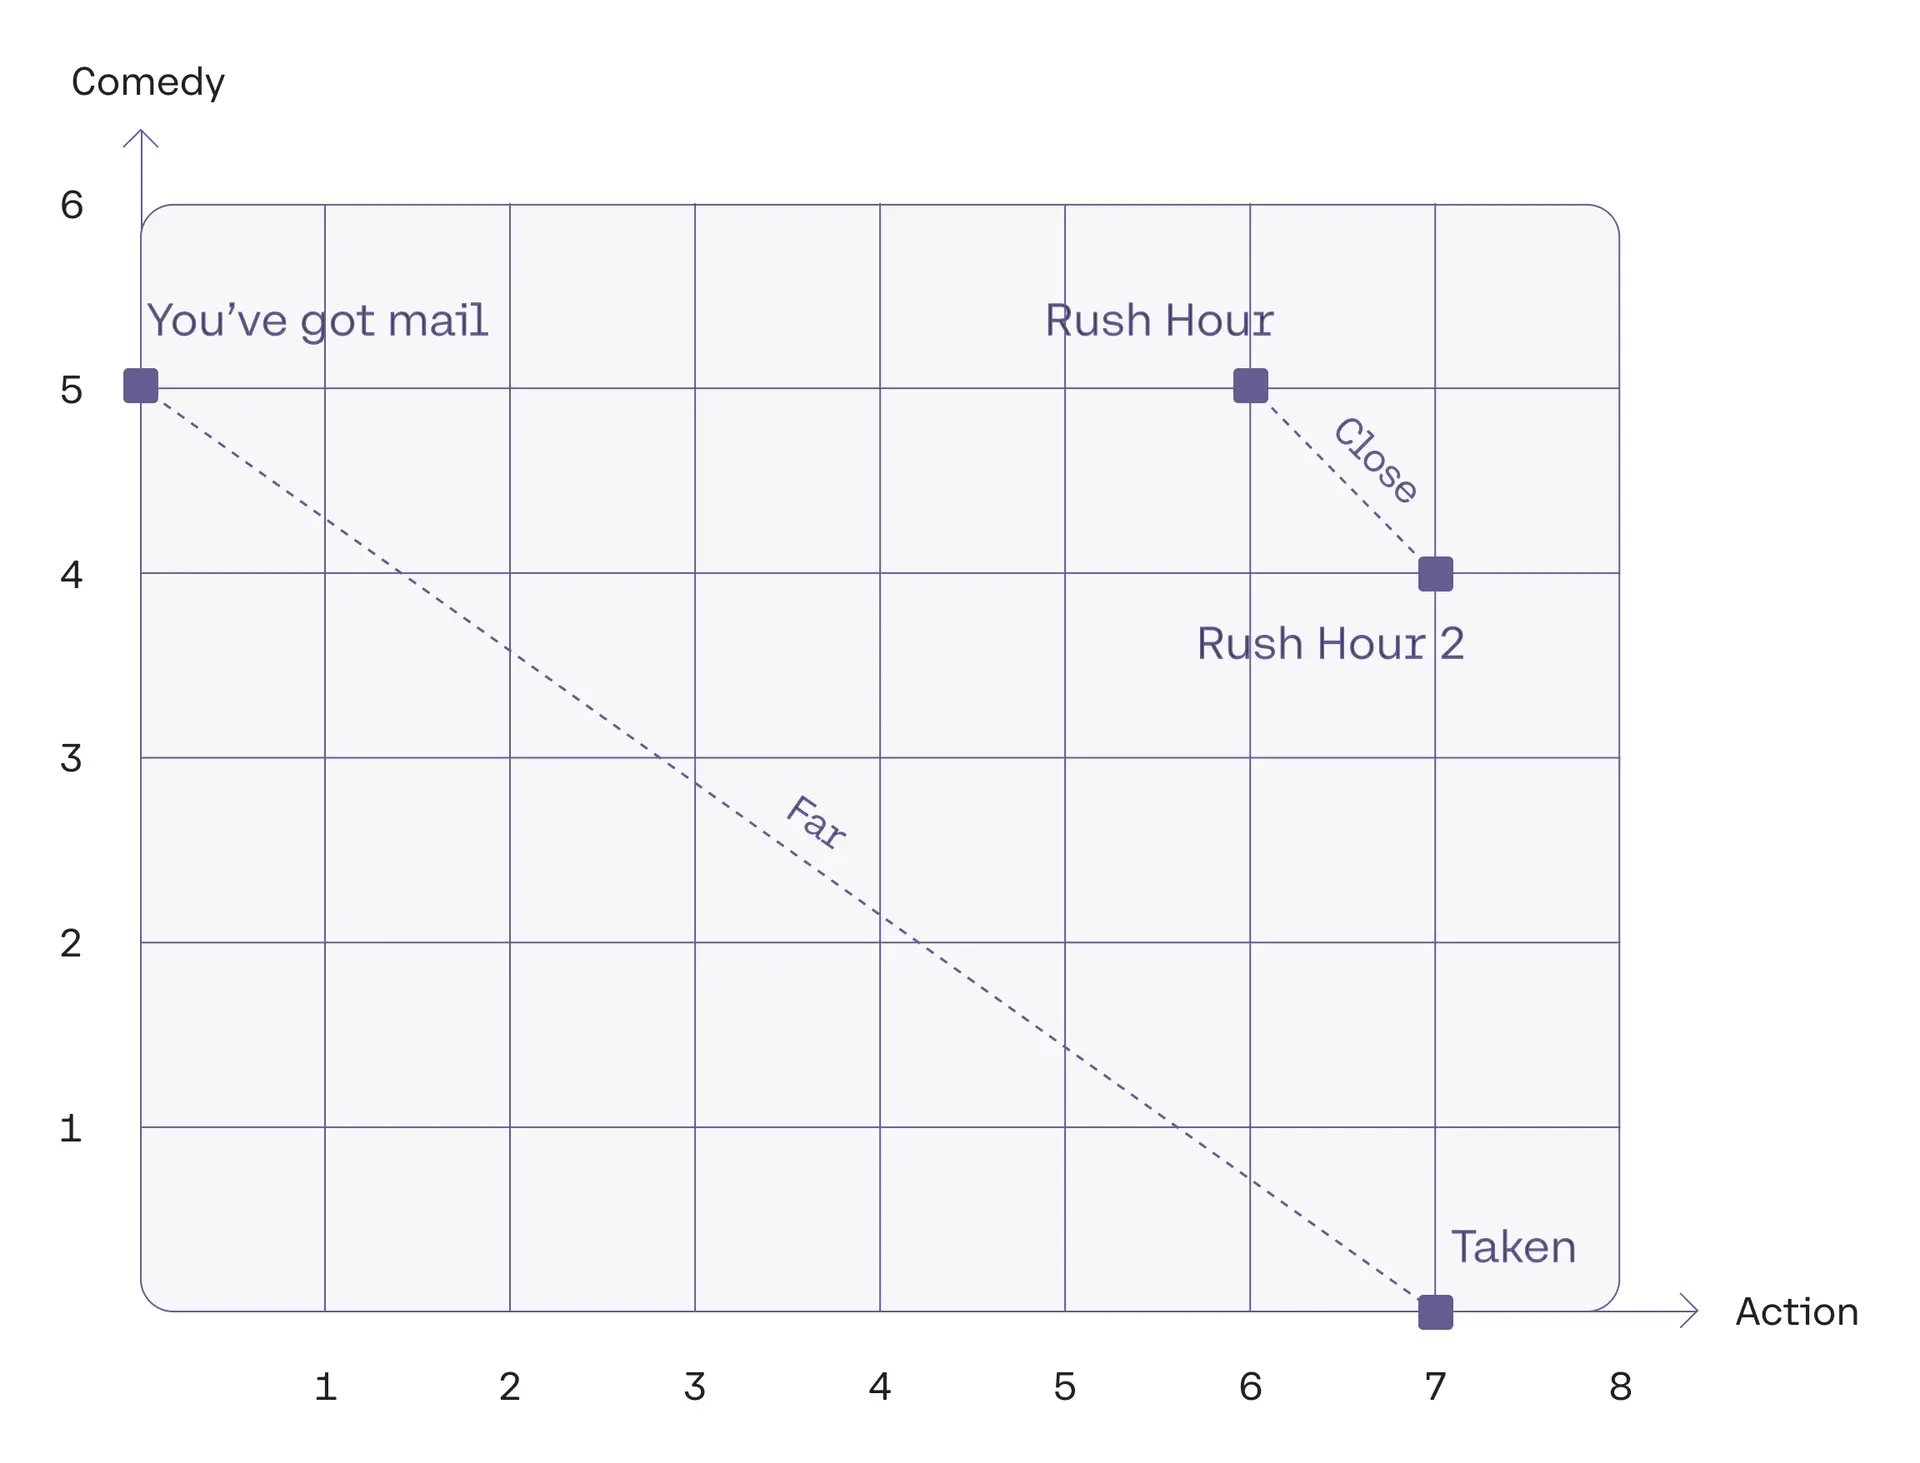

### Cosseno dos ângulos entre os vetores:

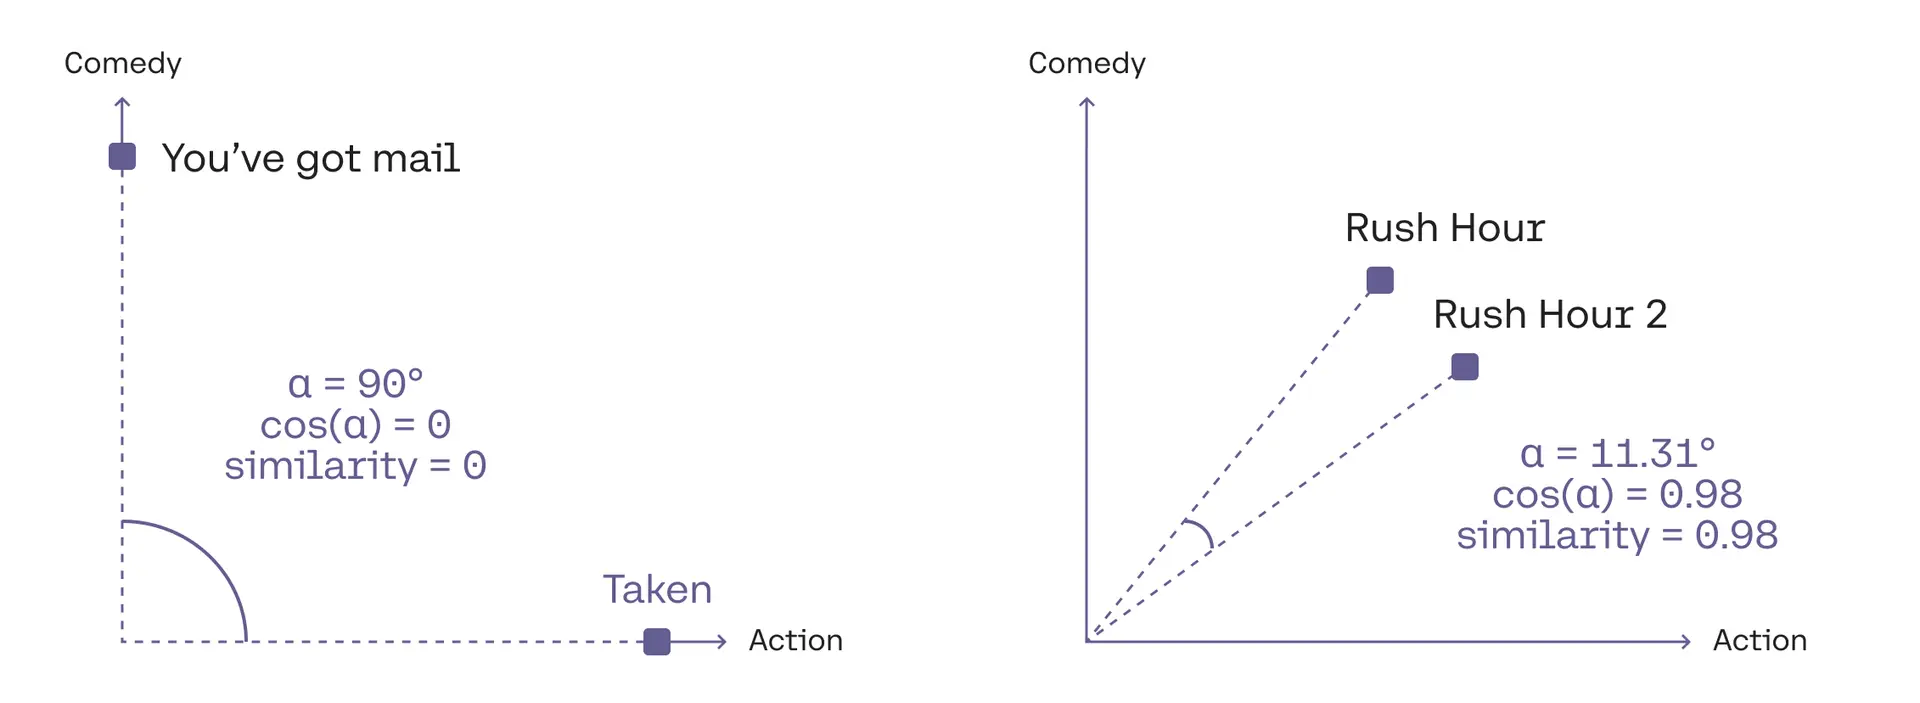

Perceba que o ângulo entre os filmes *You've Got Mail* e *Taken* é de 90 graus, com um cosseno igual a 0. Portanto, a similaridade entre eles é 0. Por outro lado, o ângulo entre os filmes *Rush Hour* e *Rush Hour 2* é de 11.31 graus. Seu cosseno é 0.98, o que é bastante alto. Na verdade, a similaridade entre uma frase e ela mesma é sempre 1, já que o ângulo é 0, com cosseno igual a 1.

# 4. Mecanismo de Atenção

No entanto, os embeddings de palavras têm um grande ponto fraco: palavras que possuem mais de uma definição. Se um embedding atribui um vetor para, por exemplo, a palavra “bank”, ele usa o mesmo vetor para todas as definições de “bank”. Mas e se você quiser usar essa palavra em diferentes contextos? É aqui que a atenção entra em cena.

O mecanismo de self-attention foi introduzido no artigo [Attention is All You Need](https://arxiv.org/pdf/1706.03762), escrito por vários pesquisadores da Google.

A atenção é uma maneira muito inteligente de distinguir palavras quando elas são usadas em diferentes contextos (transformando embeddings simples em embeddings contextualizados).

### Exemplo para o conceito de atenção:

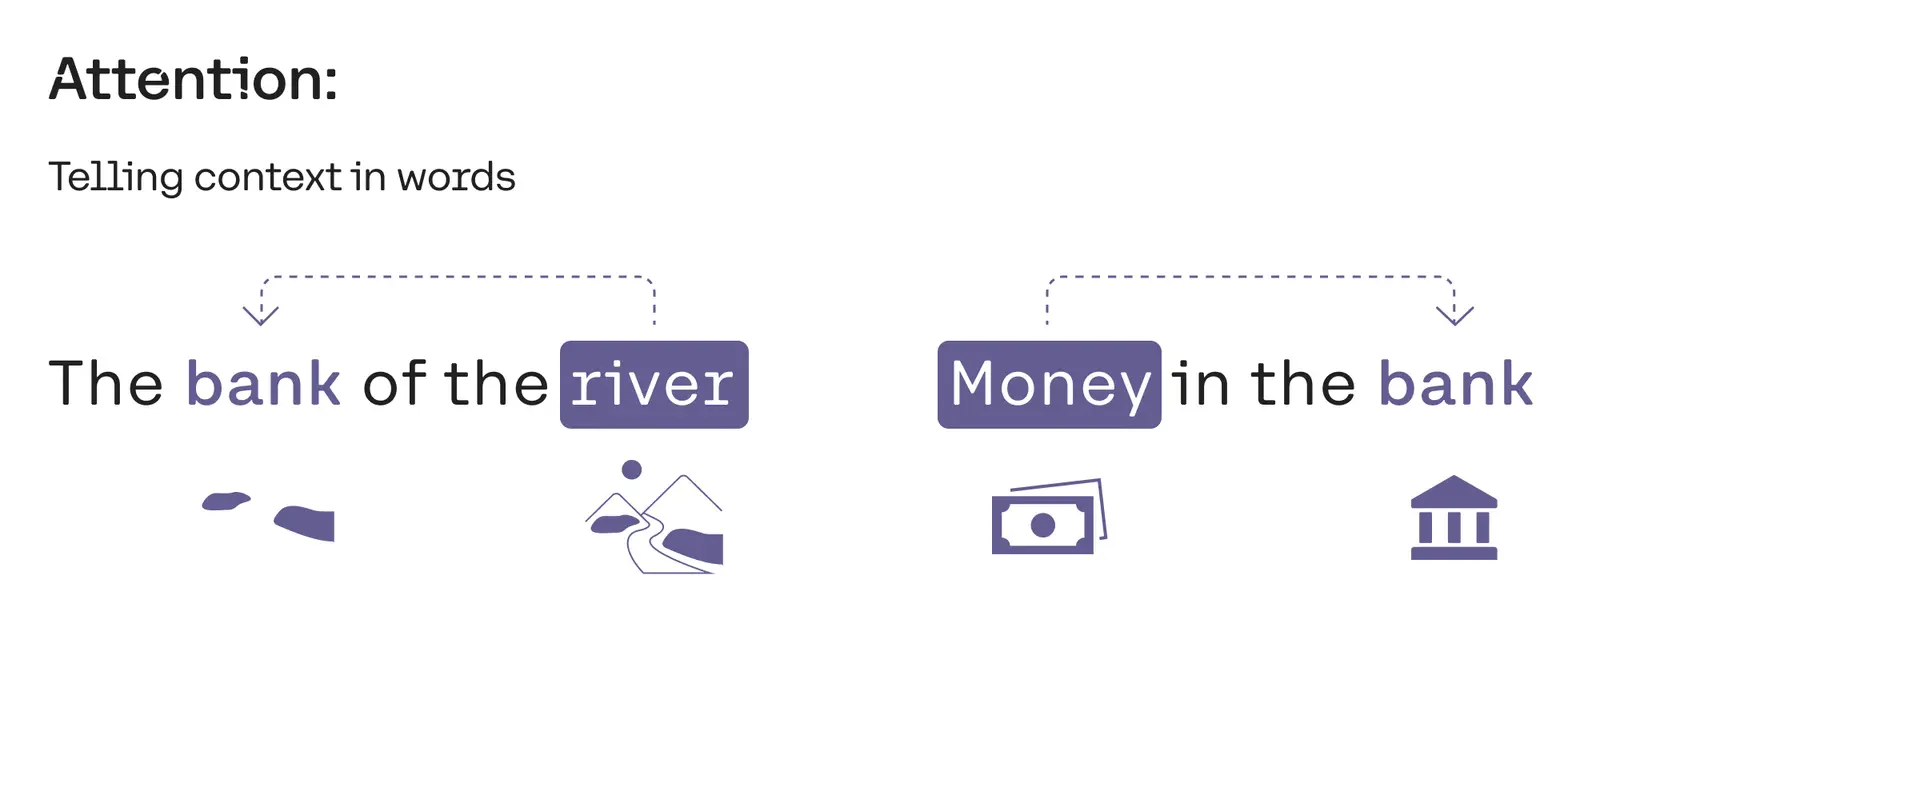

Como transformar embeddings simples em embeddings contextualizados?

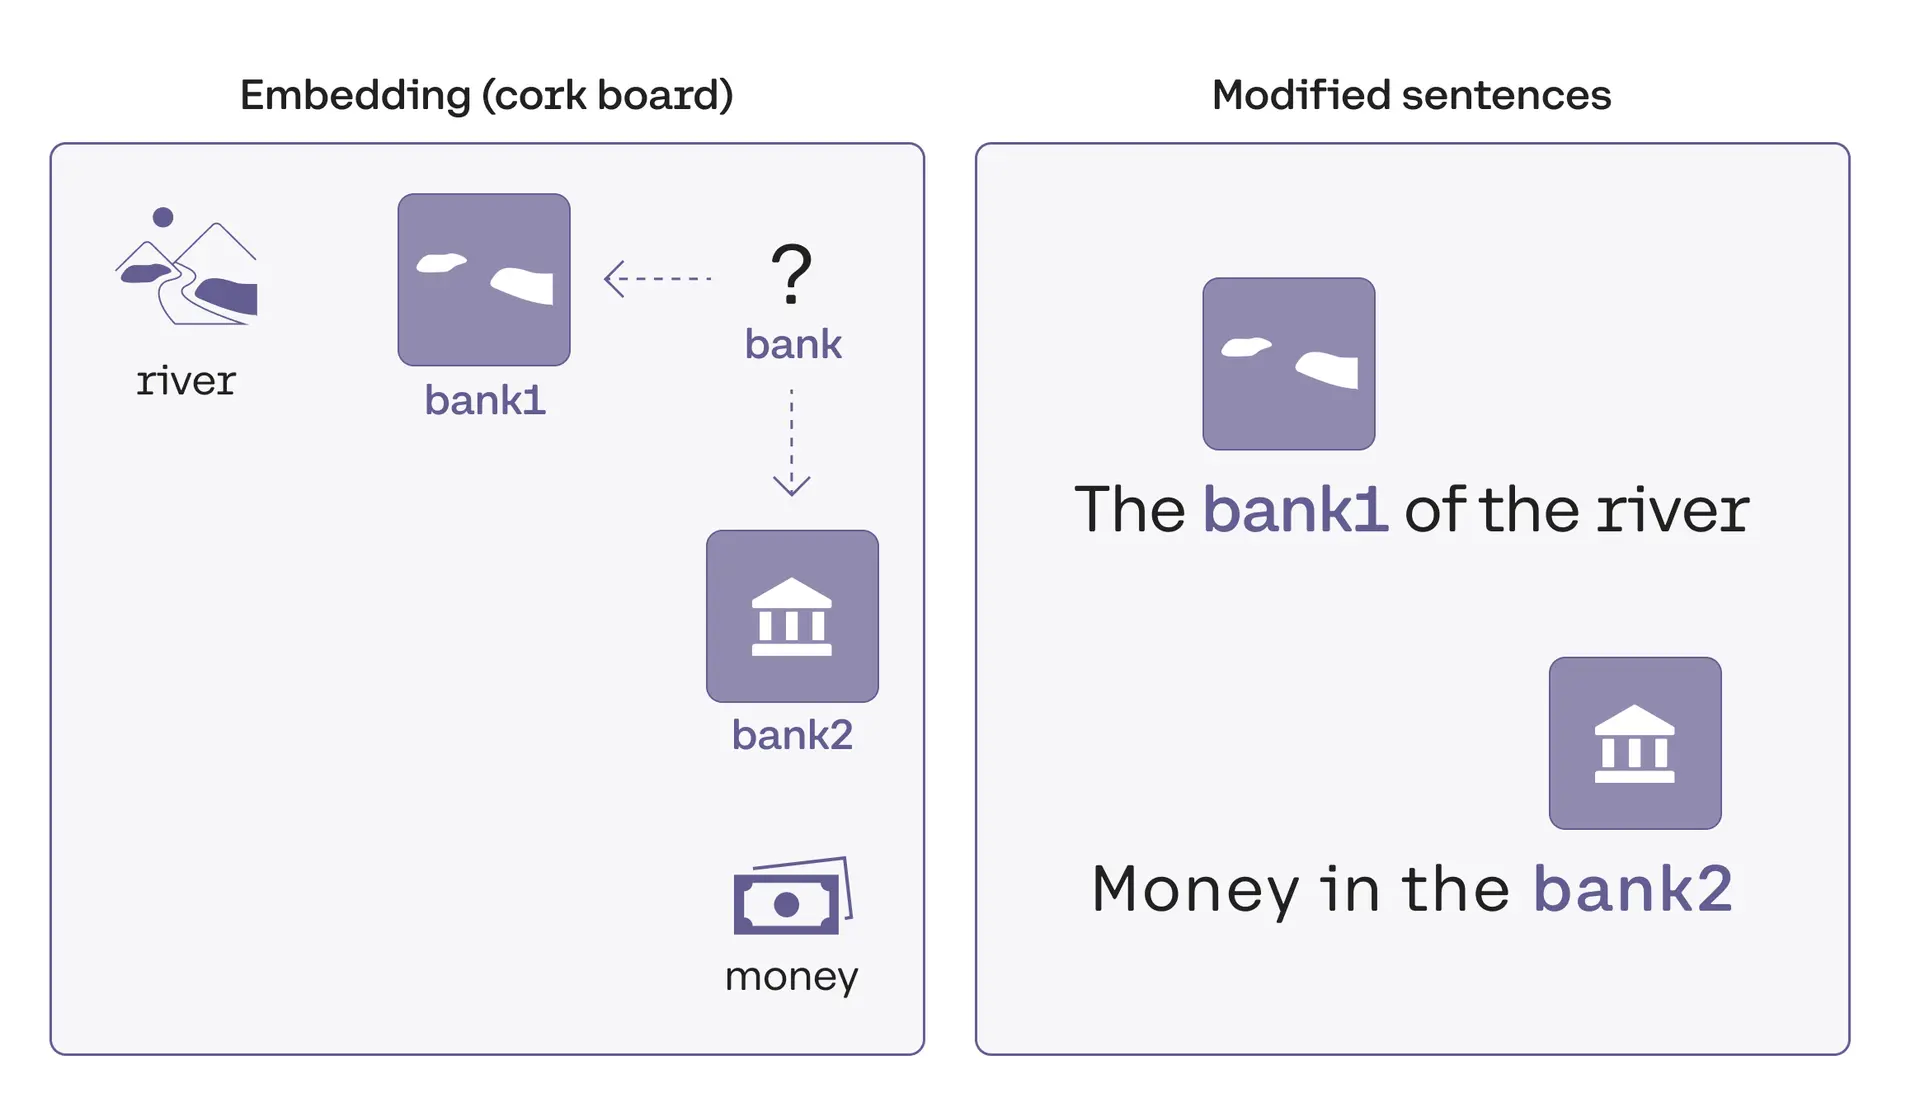

Nessas duas frases, o computador agora entende um pouco mais sobre o contexto da palavra “bank”, já que ela foi dividida em duas interpretações distintas: uma cuja definição está mais próxima de “river” e outra cuja definição está mais próxima de “money”. Isso, em resumo, é como os mecanismos de atenção funcionam.

Vamos supor que os vetores de embedding original sem contexto são:
* River: [0,5]
* Money: [8,0]
* Bank: [6,6]

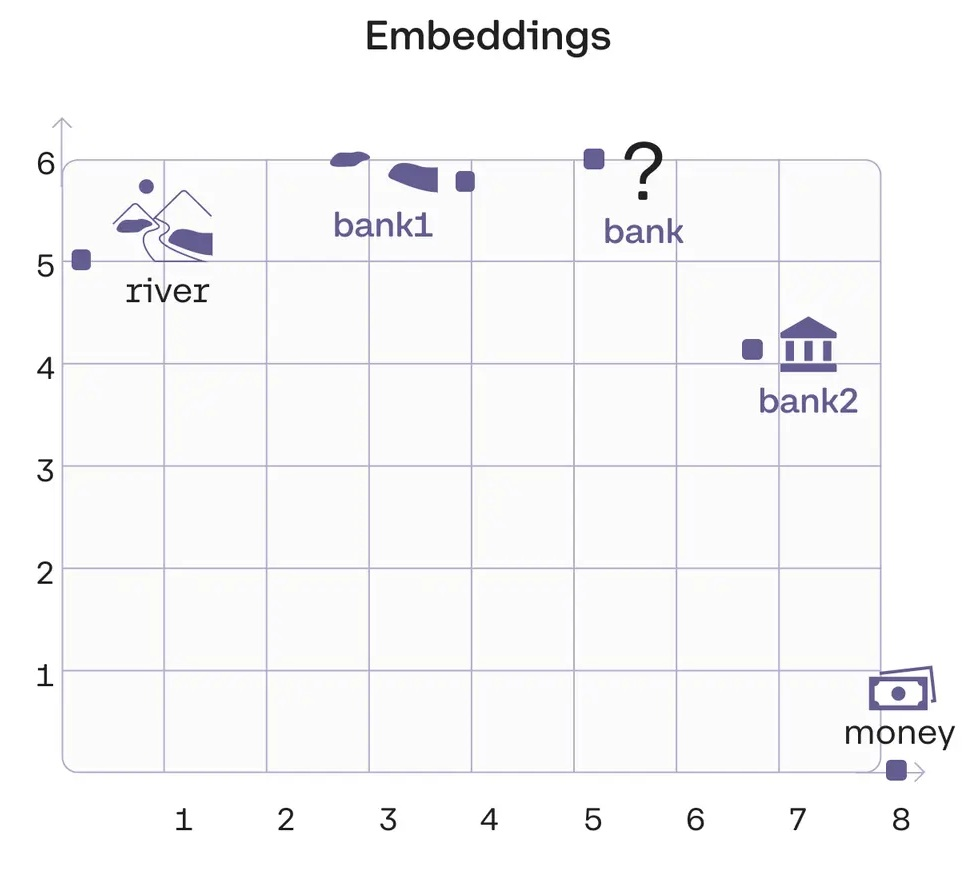

### Matriz de similaridades (cosseno) entre as palavras

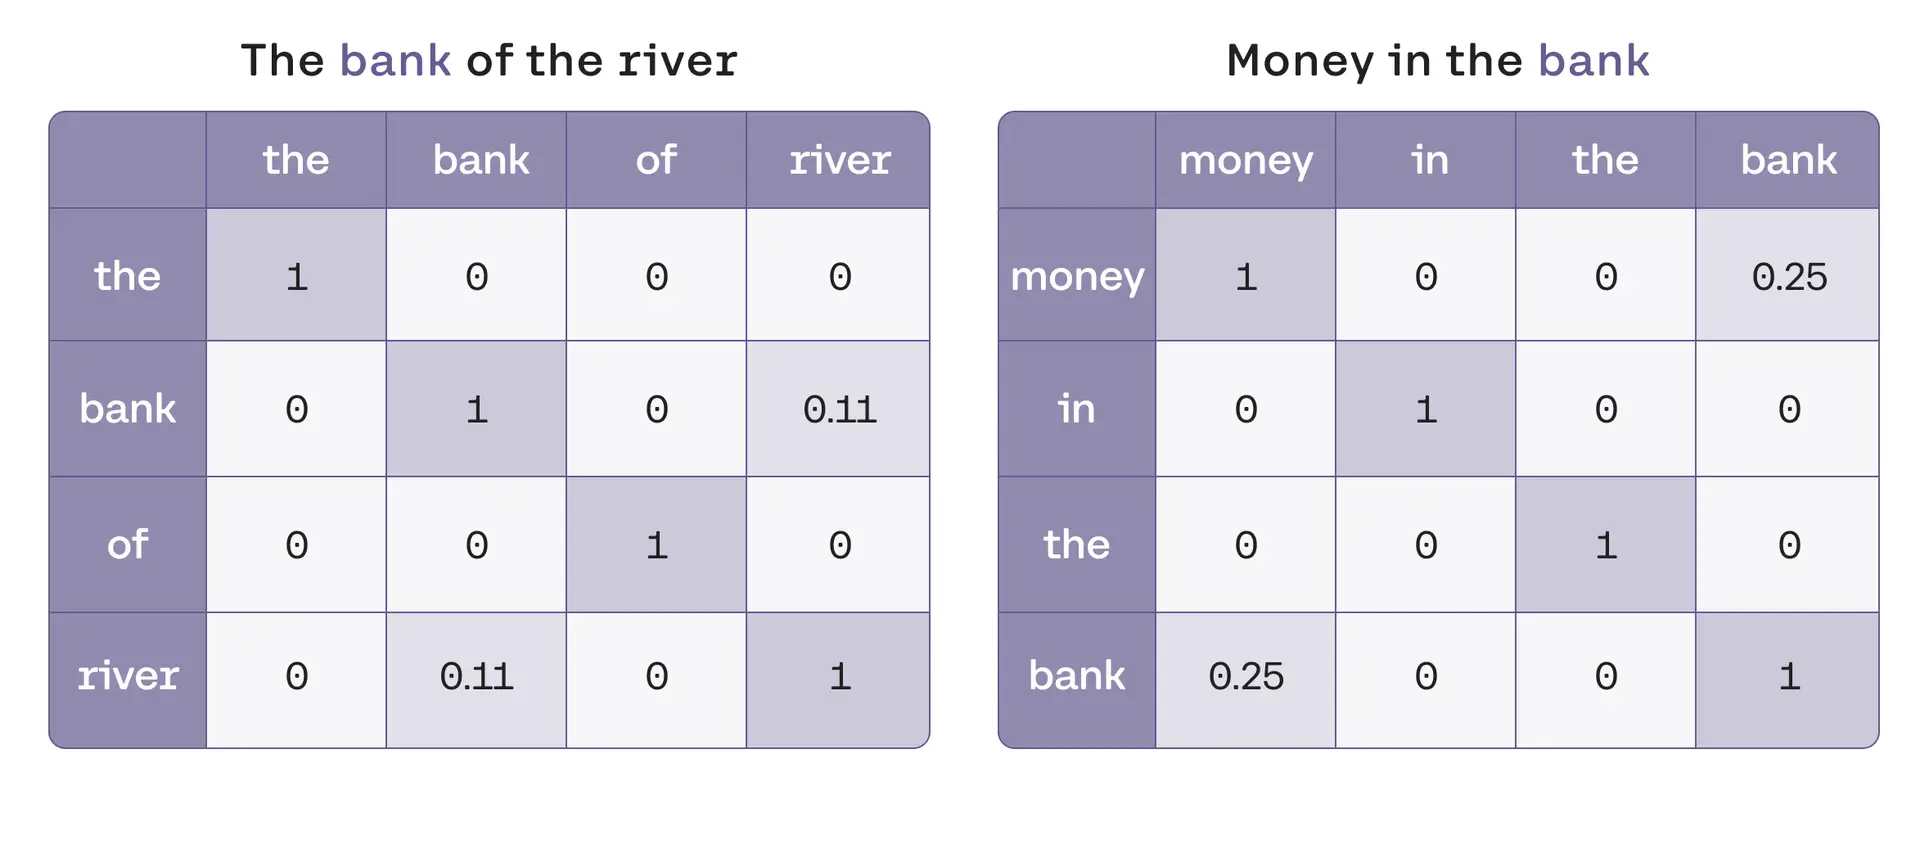

No Exemplo 1 (esquerda), as similaridades da palavra “bank” com as outras palavras da frase “The bank of the river” são as seguintes:

* the: 0
* bank: 1
* of: 0
* river: 0.11

### Equacionando os embeddings para ganhar contexto

**Exemplo 1:** Chamaremos esse embedding de Bank1

Bank1 = 0 x "the" + 1 x "bank" + 0 x "the" + 0.11 x "river"

Bank1 = 1 x "bank" + 0.11 x "river"

Dividindo os coeficientes pela soma total (1.11), temos:

Bank1 = 0.9 x "bank" + 0.1 x "river"

Bank1 = 0.9 x [6, 6] + 0.1 x [0, 5]

Bank1 = [5.4, 5.9]

**Exemplo 2 (mesmo procedimento):**

Bank2 = 0.8 x "bank" + 0.2 x "river"

Bank2 = [6.4, 4.8]

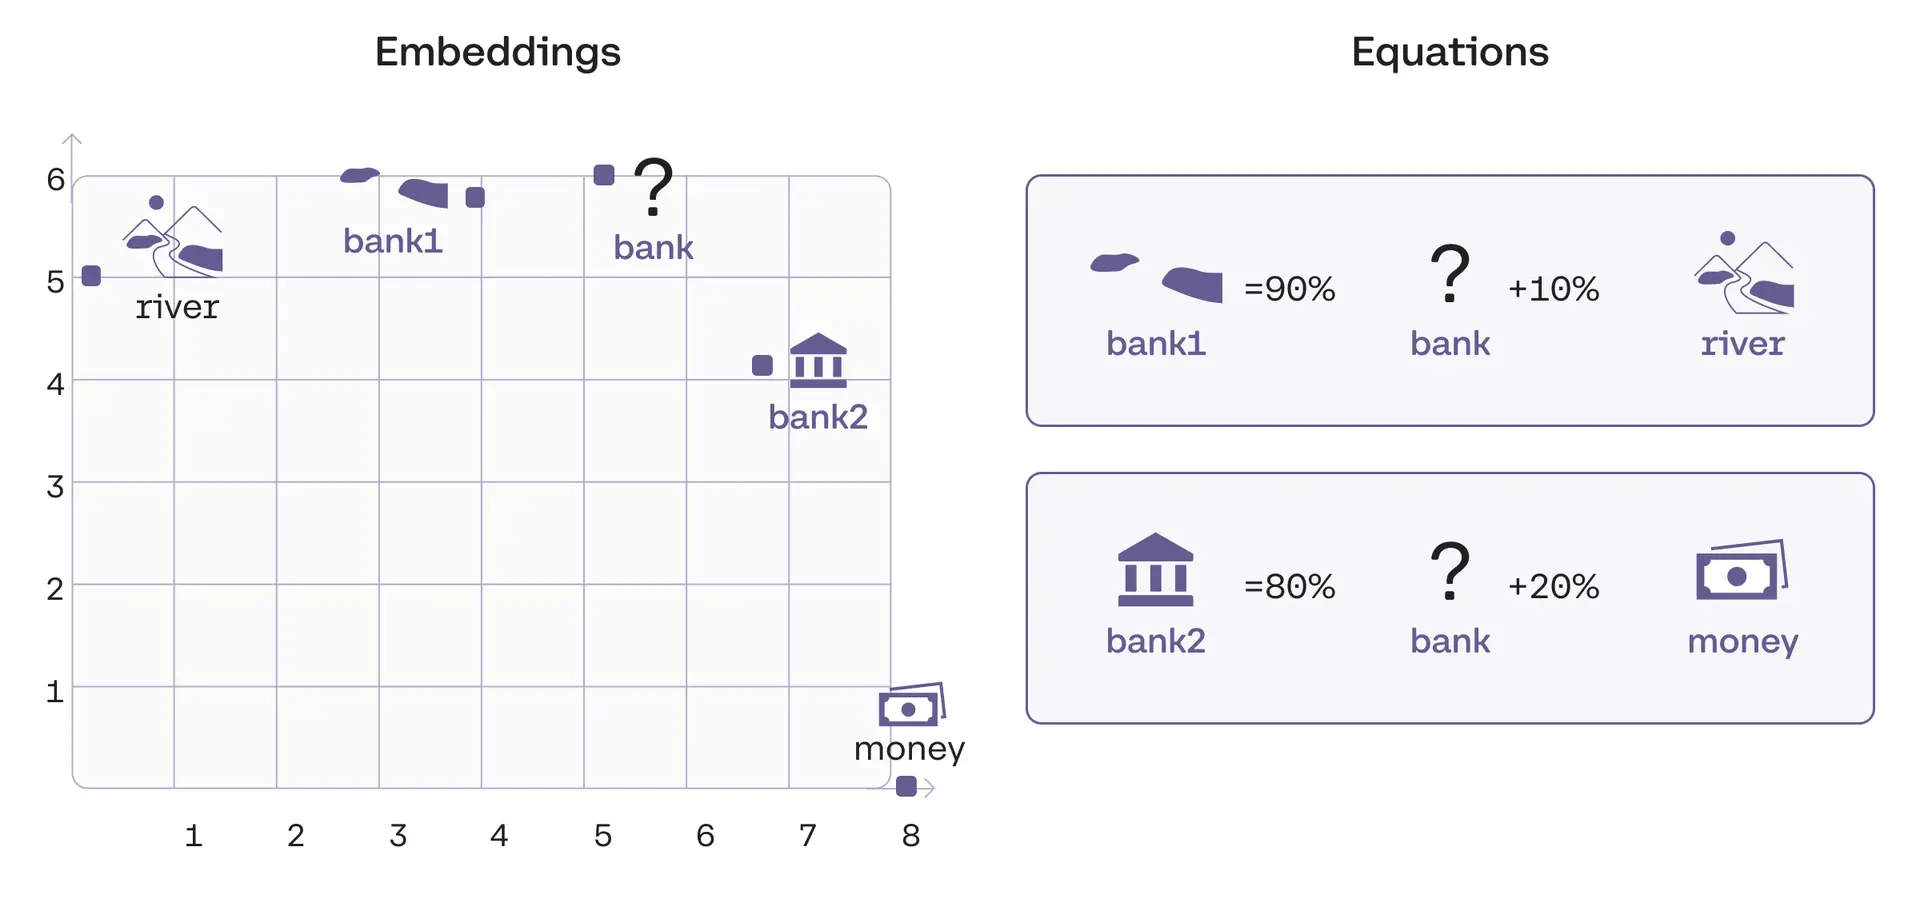

Como podemos ver, “Bank1” está mais próximo de “river”, e “Bank2” está mais próximo de “money”. Na verdade, “Bank1” está na linha entre “bank” e “river”, a 10% do caminho. Da mesma forma, “Bank2” está na linha entre “bank” e “money”, a 20% do caminho.

Assim, o mecanismo de atenção conseguiu dividir a palavra “bank” em duas interpretações distintas e utilizá-las corretamente em cada sentença correspondente.

# 5. Large Language Models

Os principais elementos estruturais de um LLM são:
* Tokenization
* Positional Encoding
* Embeddings
* Similaridade
* Transformer blocks (vários):
 1.  Mecanismo de Atenção
 2.  Redes neurais (matrizes de pesos e viéses)
* Probabilidades (softmax)

### Representação esquemática de um LLM

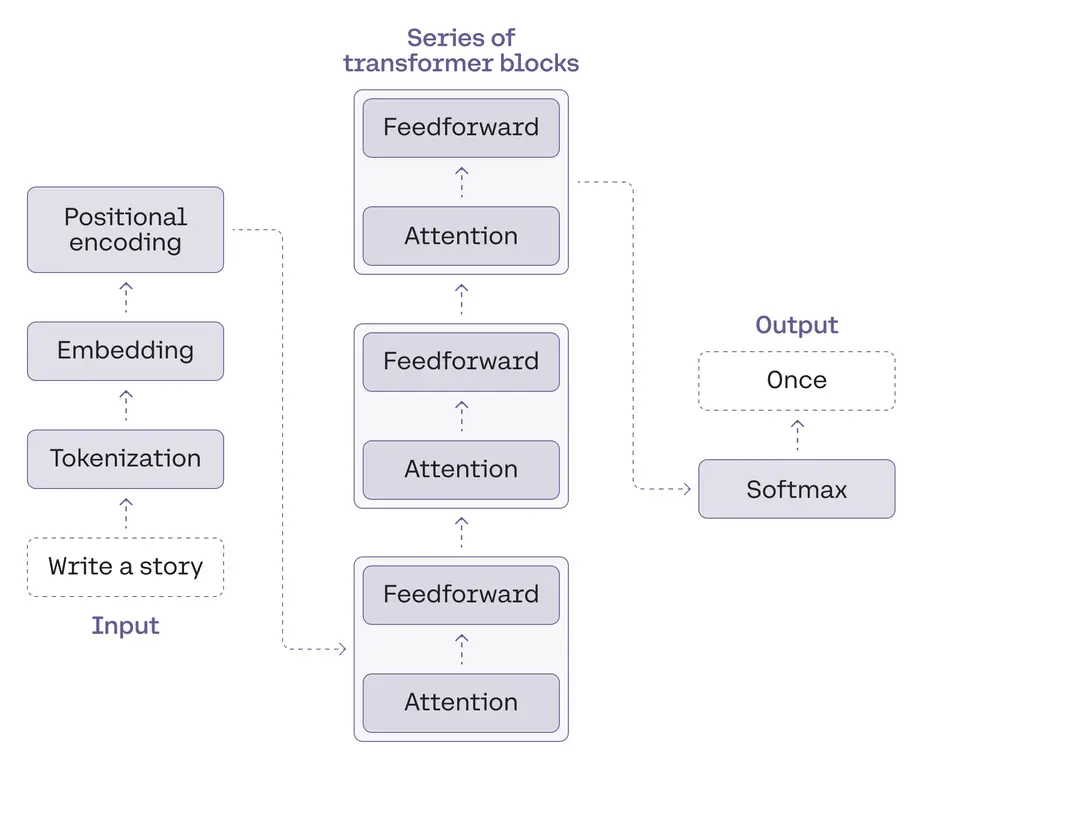

## 5.1. Tokenization

A tokenização consiste em um grande conjunto de dados de tokens, incluindo todas as palavras, sinais de pontuação, etc. O processo de tokenização analisa cada palavra, prefixo, sufixo e sinais de pontuação, e os associa a um token conhecido da biblioteca.









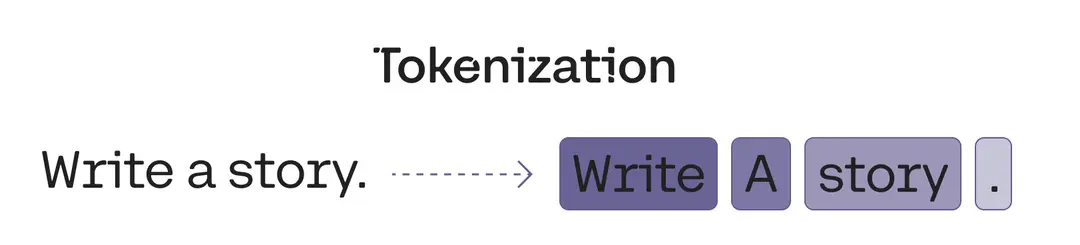

## 5.2. Embedding

Depois que a entrada é tokenizada, é hora de transformar as palavras em números. Para isso, usamos um embedding. Em sessões anteriores, discutimos como os embeddings de texto convertem cada trecho de texto em um vetor (uma lista) de números.

Se dois trechos de texto são semelhantes, então os números em seus respectivos vetores também são semelhantes entre si (componente por componente, ou seja, cada par de números na mesma posição é parecido). Por outro lado, se dois trechos de texto são diferentes, os números em seus vetores correspondentes também serão diferentes.

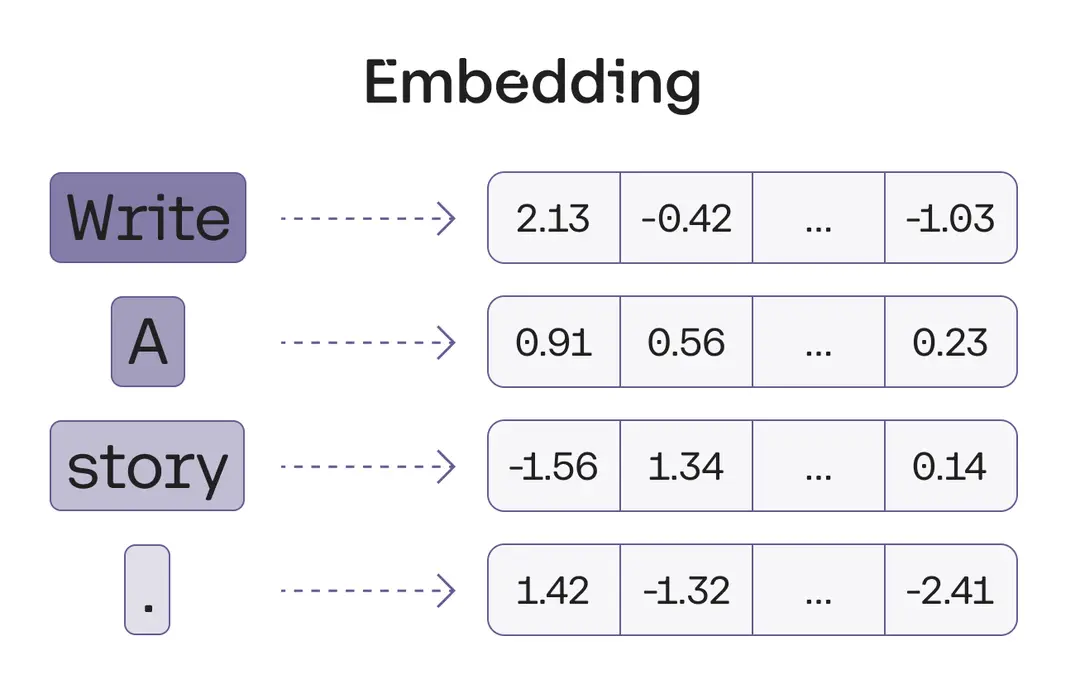

## 5.3. Positional Encoding

O Positional Encoding adiciona informações sobre a posição de cada palavra ao seu embedding, permitindo que o modelo distinga entre diferentes ordens.

Frases como "O cachorro mordeu o homem" e "O homem mordeu o cachorro" teriam as mesmas representações se o modelo não soubesse a ordem correta dos tokens.

O Positional Encoding é então somado ao embedding de cada palavra:

*Embedding final = Embedding da palavra + Positional Encoding*

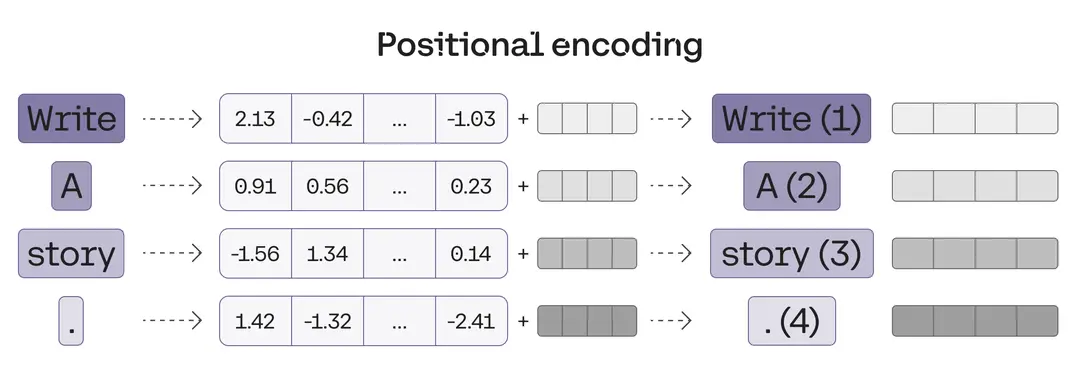

O modelo aprende os vetores de posição durante o treinamento, assim como aprende os embeddings das palavras. Cada posição tem um vetor de embedding treinável associado a ela.

## 5.4. Transformer block

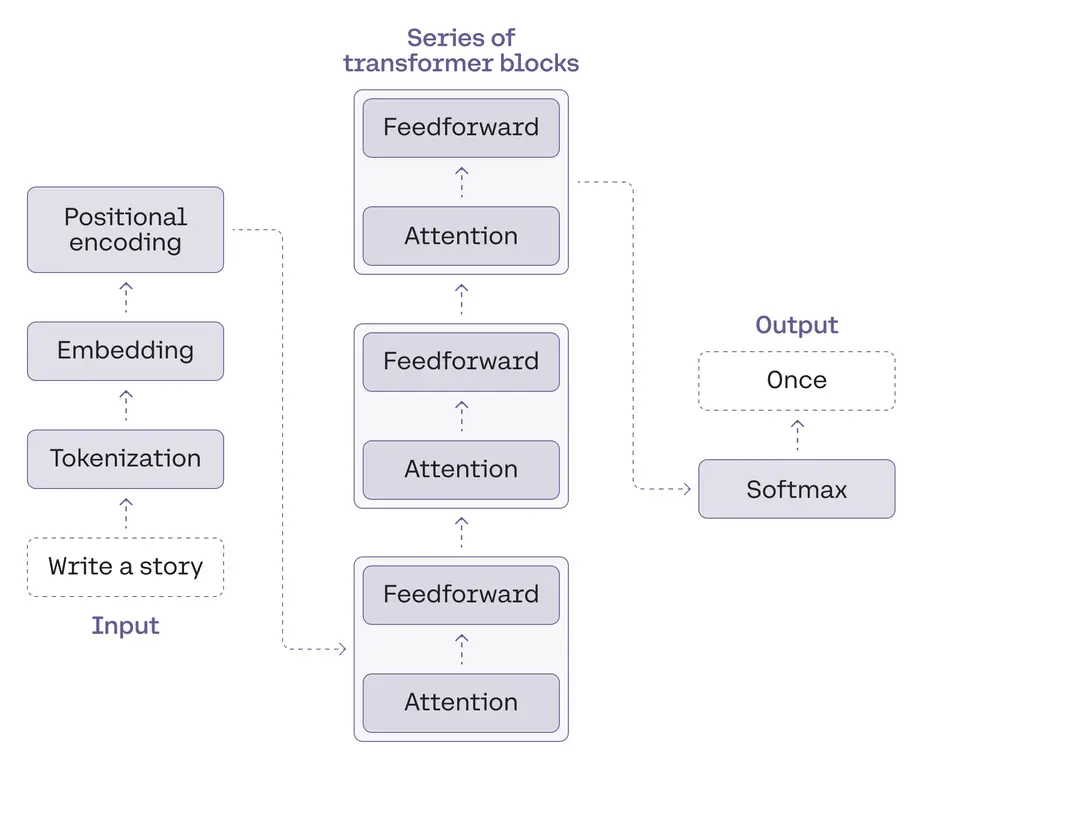

Vamos recapitular o que vimos até agora. As palavras entram e são convertidas em tokens (tokenização), os tokens são transformados em números (embeddings), e então a ordem das palavras é considerada (codificação posicional). Isso nos dá um vetor para cada token que inserimos no modelo.

Agora, o próximo passo é prever a próxima palavra na frase. Isso é feito por uma rede neural extremamente grande, treinada especificamente com esse objetivo: prever a próxima palavra em uma sentença.

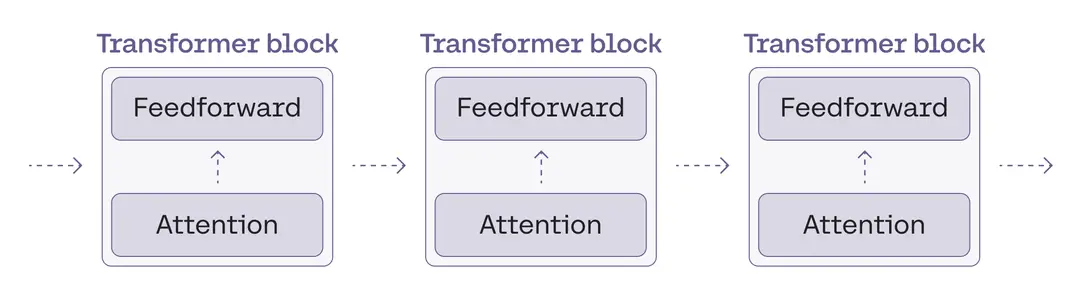

O **mecanismo de atenção** não se limita aos vizinhos imediatos de uma palavra — ele considera toda a sequência ao calcular o contexto de cada token.

Em uma frase longa como "O cachorro que estava no parque correu para casa", o verbo "correu" pode se conectar a "cachorro" mesmo que estejam distantes, capturando relações de longo alcance. Isso ajuda a criar representações contextualizadas, incorporando informações de todas as palavras na frase.

A camada **Feedforward** ajuda a refinar a representação de cada palavra, aplicando não-linearidades e criando vetores mais complexos.

Alguns dados para o chat GPT 3 (Generative Pre-trained Transformer):
* 175 bilhões de parâmetros (incluindo matrizes de pesos nas diversas camadas do modelo)
* Dimensões de embedding de 12.288
* 96 camadas de atenção

## 5.5. Cálculo das Probabilidades

O último passo de um transformer é uma camada softmax, que converte esses escores em probabilidades (que somam 1), onde os escores mais altos correspondem às maiores probabilidades. Em seguida, podemos amostrar a próxima palavra com base nessas probabilidades.

No exemplo, o transformer atribui a maior probabilidade de 0.5 para “Once” e probabilidades de 0.3 e 0.2 para “Somewhere” e “There”, respectivamente. Após a amostragem, a palavra “Once” é selecionada, tornando-se a saída selecionada.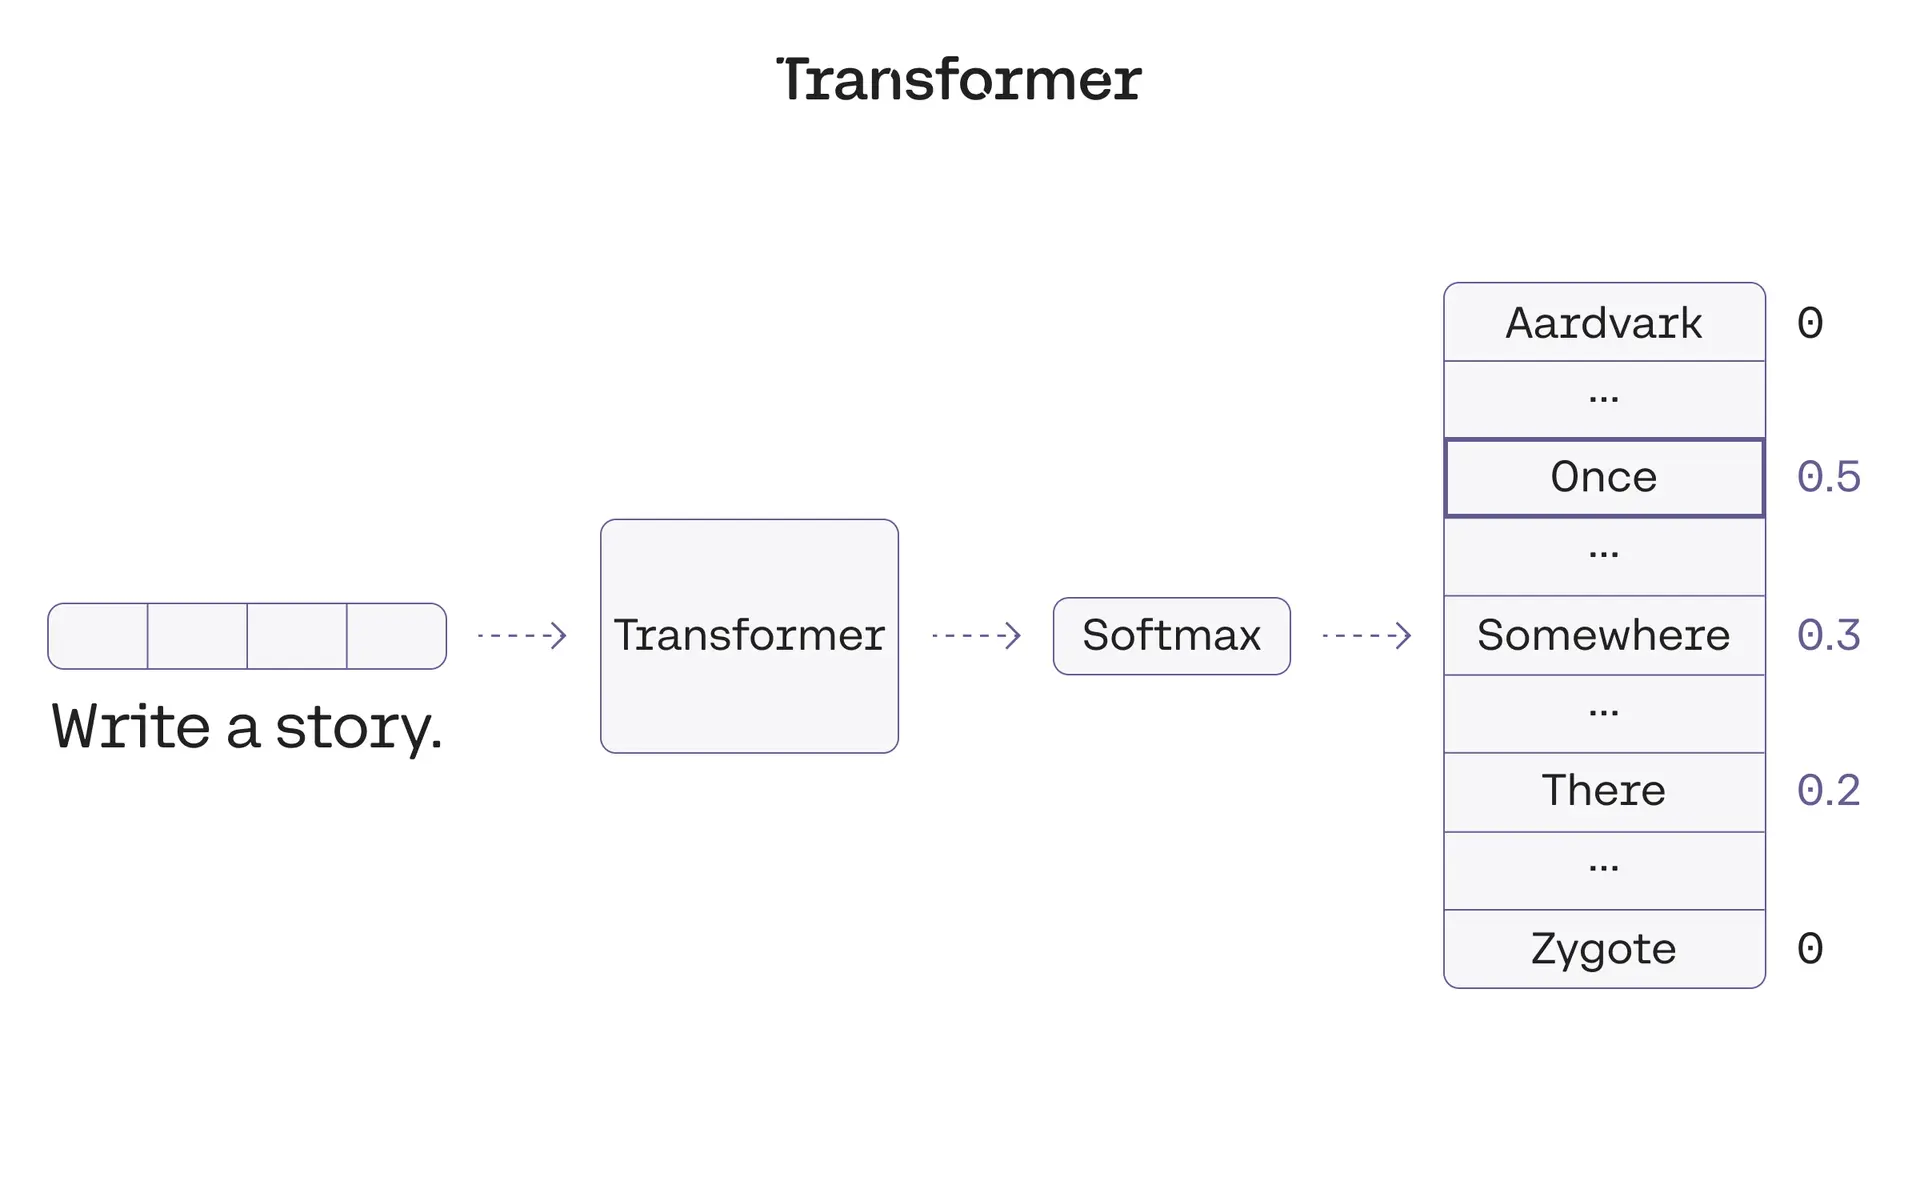









E agora? É só repetirmos o processo. Agora inserimos o texto “Write a story. Once” no modelo, e, muito provavelmente, a saída será “upon”. Repetindo esse passo várias vezes, o transformador acabará escrevendo uma história completa, como por exemplo: “Once upon a time, there was a …”.